# 나이브베이즈_분류분석
- https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


## 데이터 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [7]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## 결측치 및 중복값 처리

In [12]:
# 결측값 비율 확인
data.isna().sum() / len(data) * 100

Daily Time Spent on Site    0.0
Age                         8.4
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

In [13]:
# 5% 이상이 결측치이므로 결측치 대치 수행
# 수치형 자료이므로 평균이나 중앙값으로 대치 
data['Age'].describe()

count    916.000000
mean      36.128821
std        9.018548
min       19.000000
25%       29.000000
50%       35.000000
75%       42.000000
max       61.000000
Name: Age, dtype: float64

In [16]:
# 평균값 대치
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [17]:
# 결측치 확인
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [20]:
# 중복값 확인
# 중복값은 없는 것으로 확인
len(data[data.duplicated()])

0

## 이상치 처리
- 이상치가 존재하는 컬럼은 Age, Area Income 만 존재
- RObustScaler 적용하여 이상치 완화

In [56]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.631066,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.750000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,36.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,41.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [21]:
# 문자형, 숫자형 데이터 구분
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude='object')

In [22]:
data_obj.columns

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [23]:
data_num.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

<Axes: >

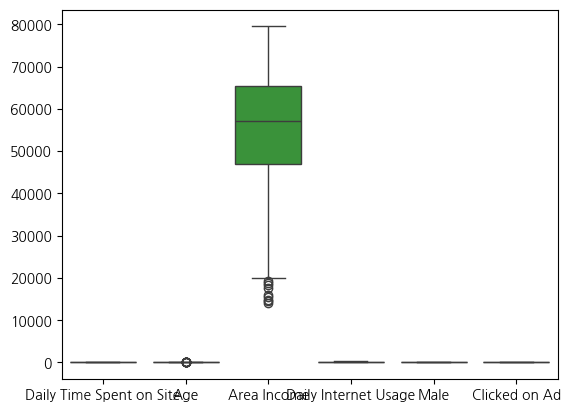

In [57]:
# 수치형 자료의 박스 플롯 확인(이상치 탐지)
sns.boxplot(data_num)

<Axes: >

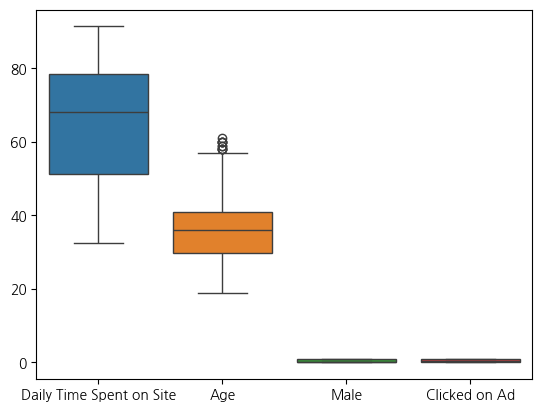

In [61]:
sns.boxplot(data_num.drop(['Area Income','Daily Internet Usage'], axis=1))

In [74]:
# 왜 이렇게 하는데 되는 걸까?
# cat_cols = data[['Ad Topic Line', 'City', 'Country', 'Male']]
# num_cols = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]

============================== Daily Time Spent on Site ==============================
count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64



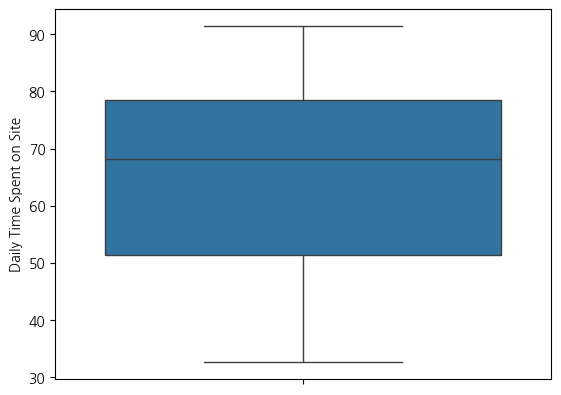




============================== Age ==============================
count    1000.000000
mean       36.128821
std         8.631066
min        19.000000
25%        29.750000
50%        36.000000
75%        41.000000
max        61.000000
Name: Age, dtype: float64



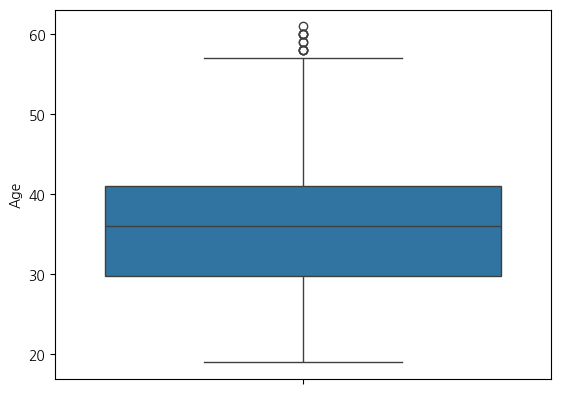




============================== Area Income ==============================
count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64



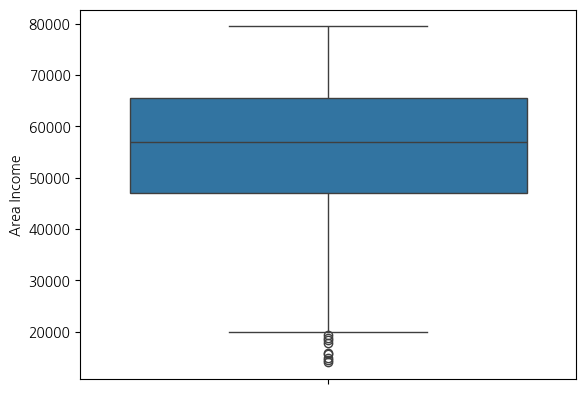




============================== Daily Internet Usage ==============================
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.792500
max       269.960000
Name: Daily Internet Usage, dtype: float64



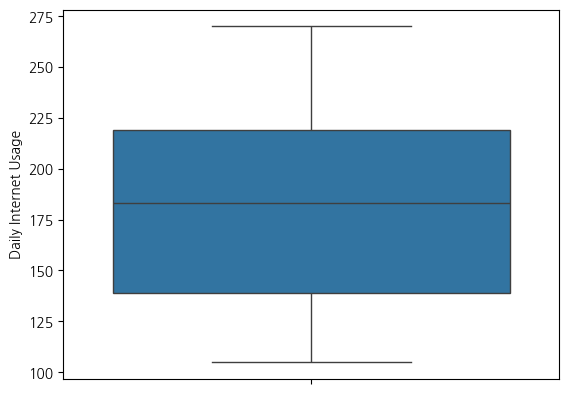




============================== Male ==============================
count    1000.000000
mean        0.481000
std         0.499889
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Male, dtype: float64



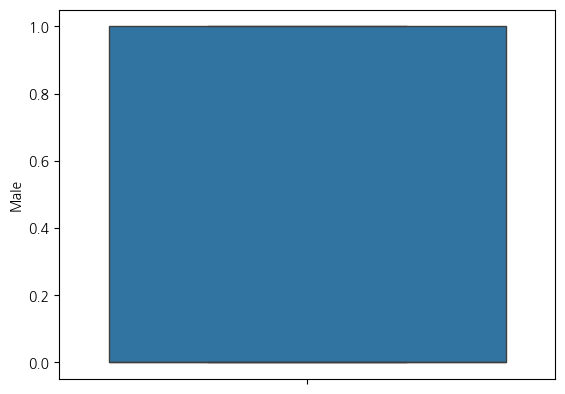




============================== Clicked on Ad ==============================
count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Clicked on Ad, dtype: float64



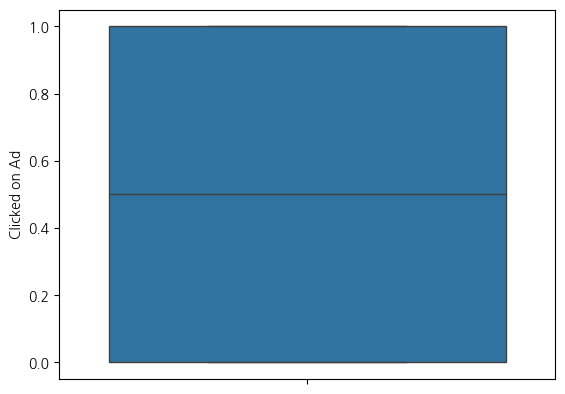

In [50]:
# 각 수치형 자료의 컬럼의 박스 플롯 확인
for col in data_num:
    print('='*30, col,'='*30)
    print(data_num[col].describe(), end='\n\n')
    
    sns.boxplot(data_num[col])
    plt.show()
    print('\n\n')
    
#     sns.histplot(data_num[col])
#     plt.show()
#     print('\n\n')
    

In [38]:
# Age 이상치 비율 확인
data_age_desc = data['Age'].describe()
age_upper_bound = data_age_desc.loc['75%'] + (1.5 *(data_age_desc.loc['75%'] - data_age_desc.loc['25%']))

# 이상치 값 확인
# 이상치 비율 확인
# 1% 정도로 큰 영향을 주지 않을 정도 -> RobustScaler 적용하여 처리
len(data[data['Age']> age_upper_bound]) / len(data) * 100


1.0999999999999999

In [40]:
# Area Income 이상치 비율 확인
data_ai_desc = data['Area Income'].describe()
ai_lower_bound = data_ai_desc.loc['75%'] - (1.5 *(data_ai_desc.loc['75%'] - data_ai_desc.loc['25%']))

# 이상치 값 확인
# 이상치 비율 확인
# 12% 정도로 영향을 많이 줄 수 있음 -> RobustScaler 적용하여 처리
len(data[data['Area Income']< ai_lower_bound]) / len(data) * 100

12.1

## EDA(탐색적 데이터 분석)

In [42]:
# 광고를 클릭했는지(Clicked on Ad) 비율 확인
# 클래스 불균형 있는지 확인 -> 균형있게 분포
data['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

In [71]:
# 문자형 데이터 분포 확인 
for col in data_obj:
    print('='*30,col,'='*30)
    print()
    
    print(f"{col}의 unique 값의 수 = {data_obj[col].nunique()}", end='\n\n')
    print(data_obj[col].value_counts())
    
#     sns.barplot(data_obj[col].value_counts())
#     plt.show()
    print()
    
    print(data.groupby(col)['Clicked on Ad'].mean().sort_values(ascending=False))
    print()
    

============================== Ad Topic Line ==============================

Ad Topic Line의 unique 값의 수 = 1000

Ad Topic Line
Virtual 5thgeneration emulation                  1
Cloned 5thgeneration orchestration               1
Monitored national standardization               1
Organic bottom-line service-desk                 1
Triple-buffered reciprocal time-frame            1
                                                ..
Team-oriented grid-enabled Local Area Network    1
Centralized content-based focus group            1
Synergistic fresh-thinking array                 1
Grass-roots coherent extranet                    1
Persistent demand-driven interface               1
Name: count, Length: 1000, dtype: int64

Ad Topic Line
Visionary mission-critical application      1.0
Visionary maximized process improvement     1.0
Adaptive asynchronous attitude              1.0
Adaptive context-sensitive application      1.0
Adaptive contextually-based methodology     1.0
                  

============================== Daily Time Spent on Site ==============================

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64



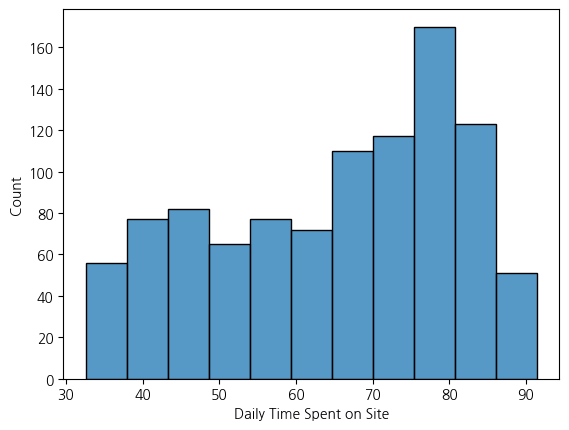

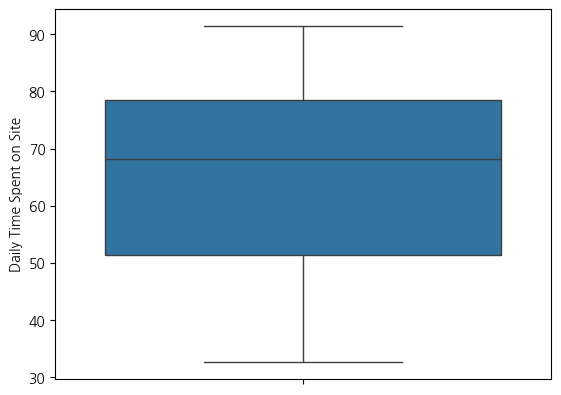


Daily Time Spent on Site
91.37    1.0
32.60    1.0
32.84    1.0
85.73    1.0
38.91    1.0
        ... 
83.67    0.0
83.69    0.0
83.71    0.0
83.86    0.0
87.85    0.0
Name: Clicked on Ad, Length: 900, dtype: float64

============================== Age ==============================

count    1000.000000
mean       36.128821
std         8.631066
min        19.000000
25%        29.750000
50%        36.000000
75%        41.000000
max        61.000000
Name: Age, dtype: float64



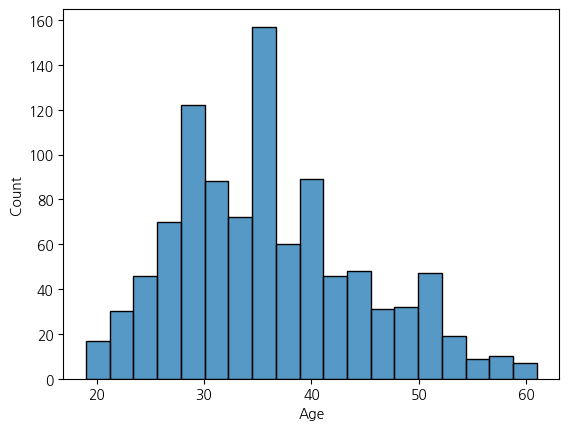

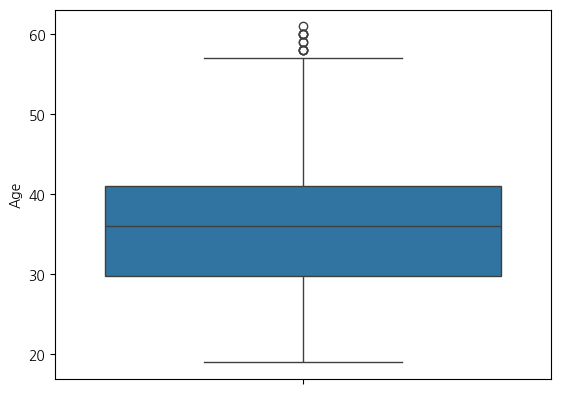


Age
57.000000    1.000000
56.000000    1.000000
55.000000    1.000000
52.000000    1.000000
61.000000    1.000000
60.000000    1.000000
59.000000    1.000000
58.000000    1.000000
54.000000    1.000000
50.000000    0.950000
49.000000    0.941176
48.000000    0.933333
47.000000    0.923077
43.000000    0.904762
53.000000    0.900000
45.000000    0.896552
51.000000    0.833333
44.000000    0.789474
42.000000    0.760000
38.000000    0.678571
41.000000    0.655172
46.000000    0.611111
39.000000    0.538462
40.000000    0.529412
37.000000    0.468750
36.128821    0.452381
36.000000    0.450000
30.000000    0.428571
23.000000    0.421053
35.000000    0.393939
29.000000    0.380952
33.000000    0.378378
34.000000    0.371429
24.000000    0.263158
32.000000    0.257143
31.000000    0.245283
28.000000    0.244444
26.000000    0.216216
27.000000    0.212121
19.000000    0.166667
20.000000    0.166667
25.000000    0.148148
22.000000    0.090909
21.000000    0.000000
Name: Clicked on Ad, dtype:

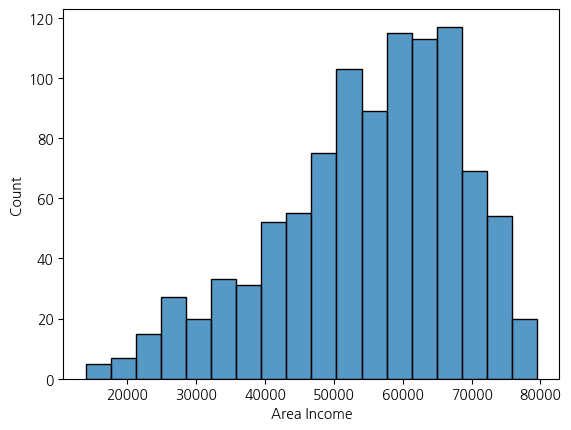

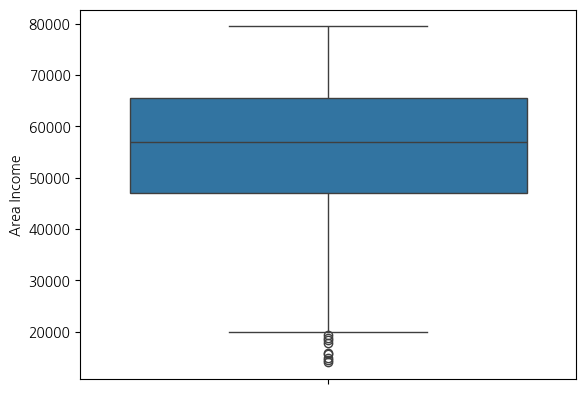


Area Income
22456.04    1.0
22205.74    1.0
13996.50    1.0
14548.06    1.0
14775.50    1.0
           ... 
73104.47    0.0
73174.19    0.0
73207.15    0.0
75535.14    0.0
57669.41    0.0
Name: Clicked on Ad, Length: 1000, dtype: float64

============================== Daily Internet Usage ==============================

count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.792500
max       269.960000
Name: Daily Internet Usage, dtype: float64



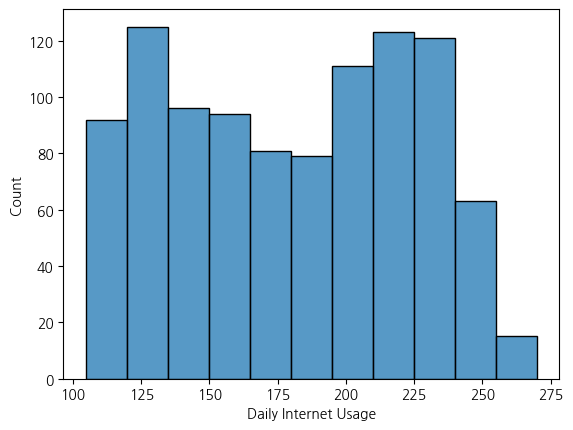

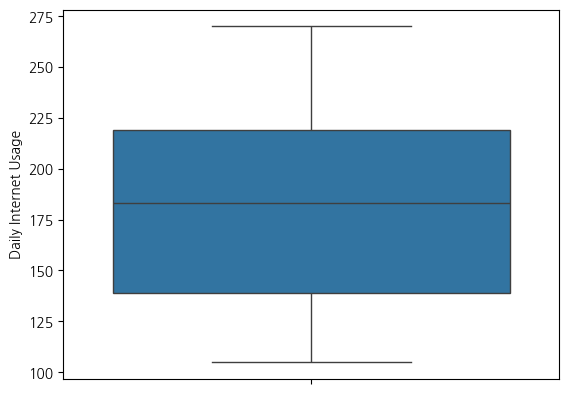


Daily Internet Usage
269.96    1.0
104.78    1.0
105.00    1.0
105.04    1.0
105.15    1.0
         ... 
236.64    0.0
236.72    0.0
236.75    0.0
236.87    0.0
181.25    0.0
Name: Clicked on Ad, Length: 966, dtype: float64

============================== Male ==============================

count    1000.000000
mean        0.481000
std         0.499889
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Male, dtype: float64



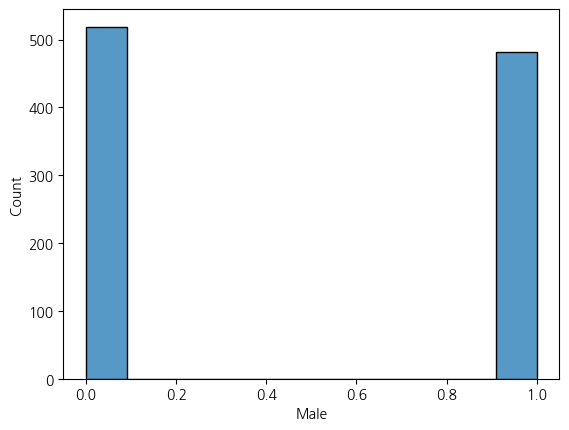

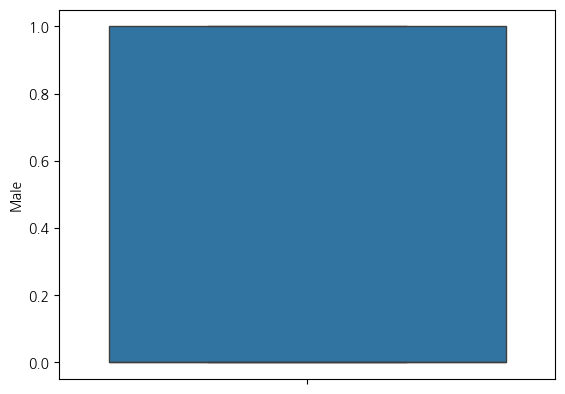


Male
0    0.518304
1    0.480249
Name: Clicked on Ad, dtype: float64

============================== Clicked on Ad ==============================

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Clicked on Ad, dtype: float64



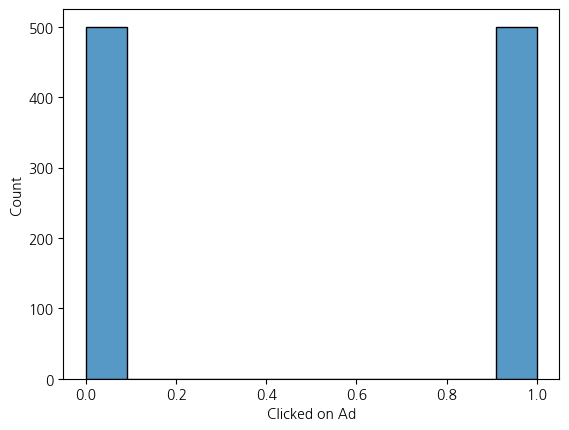

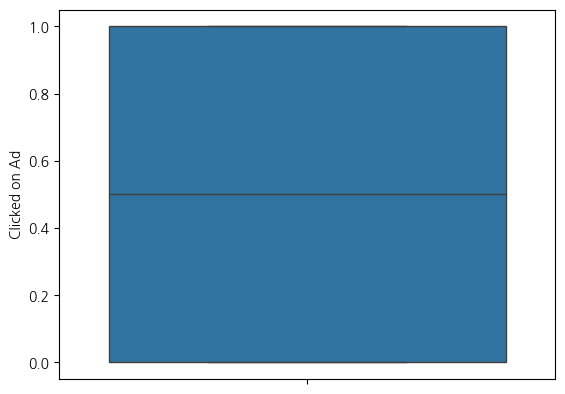


Clicked on Ad
1    1.0
0    0.0
Name: Clicked on Ad, dtype: float64



In [73]:
# 숫자형 데이터 분포 확인
for col in data_num:
    print('='*30,col,'='*30, end='\n\n')
    print(data_num[col].describe(), end='\n\n')

    sns.histplot(data_num[col])
    plt.show()
    print()
    
    sns.boxplot(data_num[col])
    plt.show()
    print()
    
    print(data.groupby(col)['Clicked on Ad'].mean().sort_values(ascending=False))
    print()
    

In [78]:
data_num.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

============================== Daily Time Spent on Site ==============================



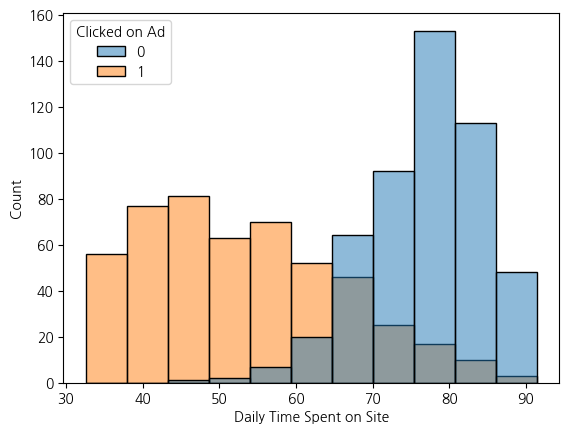




============================== Age ==============================



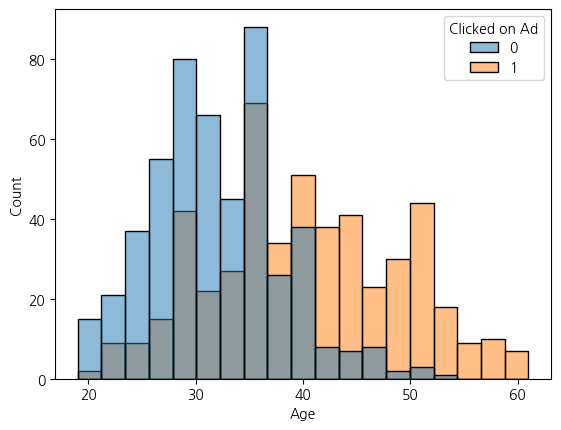




============================== Area Income ==============================



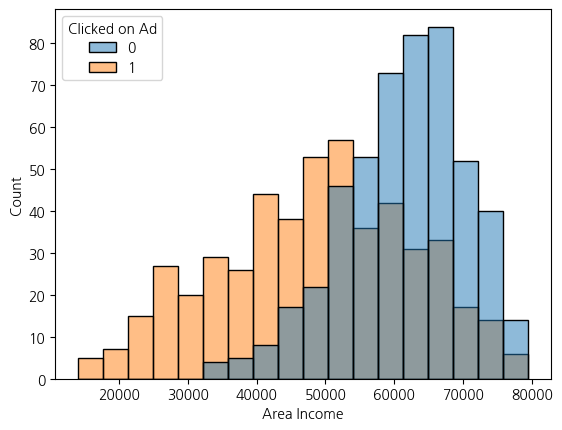




============================== Daily Internet Usage ==============================



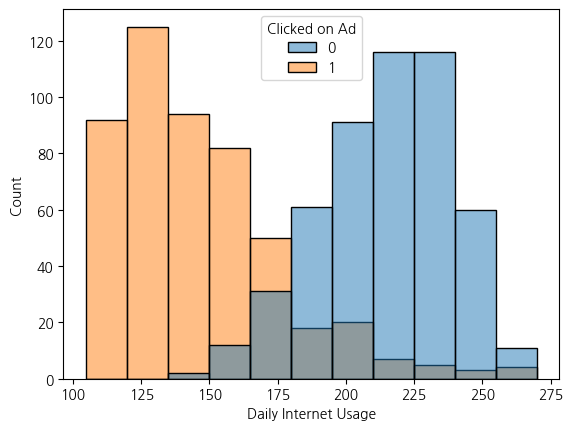




============================== Male ==============================



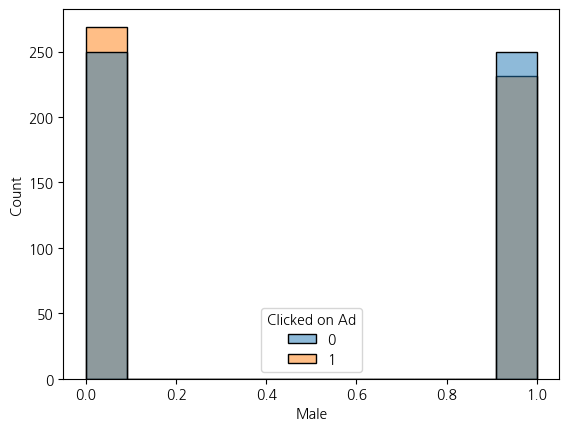

In [81]:
for col in data_num:
    if col != 'Clicked on Ad':
        print('='*30,col,'='*30, end='\n\n')
        sns.histplot(x=col, hue='Clicked on Ad', data=data)
        plt.show()
    print('\n\n')

In [88]:
data = data.drop(['Ad Topic Line', 'City', 'Male', 'Country','Timestamp'], axis=1)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,36.128821,61833.90,256.09,0
1,80.23,31.000000,68441.85,193.77,0
2,69.47,26.000000,59785.94,236.50,0
3,74.15,29.000000,54806.18,245.89,0
4,68.37,35.000000,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30.000000,71384.57,208.58,1
996,51.30,45.000000,67782.17,134.42,1
997,51.63,51.000000,42415.72,120.37,1
998,55.55,19.000000,41920.79,187.95,0


In [89]:
data.corr(method='spearman')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.314454,0.283134,0.514108,-0.744873
Age,-0.314454,1.000000,-0.140395,-0.365474,0.475414
Area Income,0.283134,-0.140395,1.000000,0.339160,-0.467224
Daily Internet Usage,0.514108,-0.365474,0.339160,1.000000,-0.776607
Clicked on Ad,-0.744873,0.475414,-0.467224,-0.776607,1.000000


<Axes: >

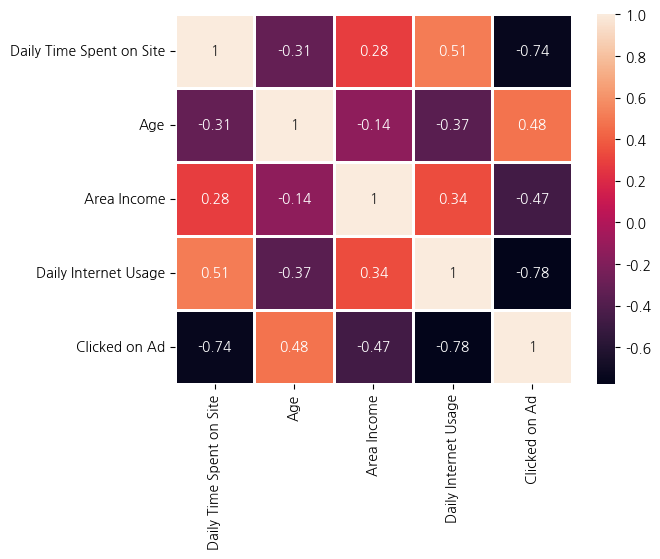

In [86]:
sns.heatmap(data.corr(method='spearman'), annot=True, linewidth=1)

## 나이브 베이즈(Naive Bayes) 이용한 분류분석

### 나이브 베이즈(Naive Bayes)
- Cold Start 사전 확률 = 50%:50%
    - 신규 고객 어떤 영화를 좋아할지 모름(Cold Start)
    - 모든 장르의 영화 좋아할 확률 50%, 싫어할 확률 50%
- 사후 확률 구하기
    - 고객이 10편의 영화를 보고 5편의 영화에 좋아요를 눌렀는데 그 중 3편이 액션영화
    - 좋아하는 영화 5편 중 3편이 액션 3/5 * 100 = 60%
    - 싫어하는 영화 5평 중 1편이 액셩 1/5 * 100 = 20%
    - 좋아하는 영화에서 액션일 확률 = 0.6 * 0.5 = 0.3
    - 싫어하는 영화에서 액션일 확률 = 0.1 * 0.5 = 0.1
    - 고객이 액션영화에 좋아요 누를 확률 = 0.3 / (0.3+0.4) = 0.75(75%)
- 사후확률 업데이트
    - 고객이 액션 영화를 좋아할 확률이 75%인 상황
    - 특정 배우가 출연하는 영화를 좋아할 것인지 다시 업데이트
    - 고객이 추가로 10편의 영화를 보고 5편의 영화에 좋아요 누름 그 중 4편은 톰크루즈가 출연하는 영화 : 4/5 * 100 = 80%
    - 싫어요를 누른 5편의 영화 중 1편이 톰 크루즈가 출연한 영화 : 1/5 * 100 = 20%
    - (0.8 * 0.75) / (0.8 * 0.75 + 0.2 * 0.25) = 0.6 / (0.6 + 0.05) = 0.923(92.3%)


### 나이브베이즈를 이용해서 분류분석 수행
- 독립변수가 수치형으로 이루어진 경우 : GaussianNB
- 문자형이 많은 경우 : MultinominalNB

---

- 나이브베이즈 -> 텍스트 분석을 하기 위함
- 문자는 컴퓨터가 인식 X -> 숫자형으로 변환할 필요가 있음
- 문자를 형태소로 쪼개는 작업 필수 -> 형태소 분석

In [94]:
from sklearn.model_selection import train_test_split

In [98]:
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [99]:
y.value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [103]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       146
           1       0.96      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## WSL 다운로드 및 실행
- https://learn.microsoft.com/ko-kr/windows/wsl/install

### Linux 파일 시스템 구조
- 리눅스 파일 시스템은 데이터를 저장하고 관리하는 방법 정의
- 파일 시스템에서 파일은 물리적 저장 장치에 저장된 데이터의 논리적 집합
    - 주요 구성 요소 : 하드웨어, 커널, 셸, 파일 시스템
    - 커널 : 프로세스, 메모리, 파일, 주변 장치, 통신 등을 관리
    - 다양한 파일 시스템을 지원
- Ubuntu 리눌스 디렉토리 구성
    - / (루트 디렉토리): 모든 파일과 디렉토리의 최상위 디렉토리
    - /bin: 시스템의 기본 명령어가 위치한 디렉토리
    - /boot: 부팅 시 필요한 커널 이미지와 부트로더 설정 파일이 저장
    - /dev: 시스템의 장치 파일(하드 드라이브, USB 장치 등)이 위치
    - /etc: 시스템 설정 파일이 위치한 디렉토리
    - /home: 사용자들의 개인 파일과 설정 파일이 저장
    - /lib: 시스템의 필수 라이브러리 파일이 위치한 디렉토리
    - /media: CD-ROM, USB 드라이브 등 외부 장치를 마운트
    - /mnt: 일시적으로 마운트된 파일 시스템을 위한 디렉토리
- 주요 명령어 및 자주 사용하는 옵션
    - pwd : 현재 디렉토리의 절대 경로를 출력하는 명령어
    - cd : 디렉토리 이동 명령어
        - 상위 디렉토리로 이동 : cd ..
        - 절대경로로 이동 : cd/home/user/Documents
        - 상대경로로 이동 : cd ../Downloads
    -  ls : 현재 데렉토리의 파일 및 하위 디렉토리 목록을 출력하는 명령어
        - a: 숨겨진 파일도 포함하여 출력
        - l: 파일의 세부 정보(권한, 소유자, 크기, 수정 시간 등)를 출력
        - h: 파일 크기를 사람이 읽기 쉬운 형식으로 출력(예: KB, MB)
    - touch: 새로운 빈 파일을 생성하거나, 기존 파일의 수정 시간을 갱신하는 명령어 / 예) touch newfile.txt

### Linux 파일 시스템 및 접근 권한 관리
- 리눅스에서는 사용자들이 파일에 대한 접근 권한을 제어 가능
- 권한은 읽기(r), 쓰기(w), 실행(x)으로 나뉩니다
- 접근 권한은 문자 표기 방식과 숫자 표기 방식으로 표현
    - 문자 표기 방식 : 권한은 rwx로 표기 첫3자리(소유자), 두 번째 3자리(그룹), 마지막 3자리(기타 사용자)
    - 숫자 표기 방식 : 권한은 읽기(4), 쓰기(2), 실행(1)로 표현, 이를 더해 권한을 숫자로 표시
    - chmod 명령어 : 파일 또는 디렉토리의 접근 권한 변경 가능 예) chmod 440 파일명
    

## Linux GUI 앱 실행
- https://learn.microsoft.com/ko-kr/windows/wsl/tutorials/gui-apps


### Linux용 Google Chrome 설치
- [리눅스 구글 크롬 설치](https://learn.microsoft.com/ko-kr/windows/wsl/tutorials/gui-apps#install-google-chrome-for-linux)
1. 디렉터리를 임시 폴더로 변경합니다 : cd /tmp
2. wget을 사용하여 다운로드 :  wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
3. 패키지를 설치 :  sudo apt install --fix-missing ./google-chrome-stable_current_amd64.deb
4. 구글 크롬 설치되었는지 확인 : google-chrome
---

### 리눅스용 구글 크롬 한글 적용
- [리눅스 구글 크롬 한글 사용 설정 블로그 참고](https://datanavigator.tistory.com/60)
1. 한글 폰트 설치 : sudo apt-get install fonts-nanum*
2. 로케일 설정 : sudo dpkg-reconfigure locales
    - 숫자키로 이동하여 ko_KR.UTF-8 UTF-8로 체크(spacebar)
    - Tab 키를 활용하요 ok 이동하여 Enter
    - ko_KR.UTF-8로 이동하여 ok 이동하여 Enter
3. 터미널 재시작
4. locale 명령으로 LANG=ko_KR.UTF-8 변경 확인 : locale
5. 한글 입력기 설치
    - sudo apt update
    - sudo apt-get update
    - sudo apt install fcitx fcitx-hangul fonts-noto-cjk dbus-x11
6. im-config 명령으로 입력기 설정 실행 후 fcitx로 설정 : im-config
7. 편집기로 .bashrc 파일을 연 후 아래의 내용 추가 : vi ~/.bashrc > :wq  엔터로 저장<br>
    #!/bin/bash<br>
    export QT_IM_MODULE=fcitx<br>
    export GTK_IM_MODULE=fcitx<br>
    export XMODIFIERS=@im=fcitx<br>
    export DefaultIMModule=fcitx<br>
 
    #optional<br>
    fcitx-autostart &>/dev/null<br>
8. source ~/.bashrc 로 변경한 설정 반영 : source ~/.bashrc 
9. 언어 설치 : sudo apt install language-selector-gnome > sudo gnome-language-selector
10. wsl 재부팅 : 시작버튼 옆의 탐색기에서 powershell 검색 후 실행
    - wsl --shutdown 진행 후 우분투 실행
11. 입력기 설치 : fcitx-config-gtk3 > Hangul 있는 경우는 따로 변경하지 않아도 됨
12. google-chrome 실행하여 ctrl + spacebar를 통해 한글 변환이 잘 되는지 확인
    

### 리눅스용 주피터 노트북 세팅

1. bash ./Miniforge3-Linux-x86_64.sh를 실행 > yes or y 눌러서 설치 진행
2. ls 확인 > cd miniforge3/ > cd bin > ./conda init
3. 파이썬 버전 확인 : Python -V
4. 가상환경 생성 : conda create create -n fintech python=3.10
5. 필요한 라이브러리 설치 : mamba install pandas matplotlib seaborn scikit-learn
6. 필요한 라이브러리 기존의 주피터 노트북(윈도우)에서 가져오기
    - cmd 창 > fintech 파일 접속(conda activate fintech) > pip list --format=freeze > packages.txt
7. Ubuntu창에서 pip install -r packages.txt 실행하여 라이브러리 설치 / pip install -r ./packages.txt
